# Example notebook for Ensemble Timesereies  

##### This notebook demonsterates how the ensemble module can be used for 1D timesereies data from a single ensemble or multi-model ensemble memebers

In [1]:
import sys
# sys.path.insert(0, '../../')
import xarray as xr
from ensemble import EnsembleTimeseries

In [2]:
# The individual ensemble memebers datasets has to be merged in a Dataset before using the EnsembleTimeseries class
def merge_dataset(var=None, models_list= None, ens_dim="Ensembles",istartdate=None,ienddate=None):
    dataset_list = []
    startdate_list = []
    enddate_list = []
    if models_list is None:
        raise NoDataError("No models provided")
    else:
        for i, data in enumerate(models_list):
            dataset_list.append(data)
            startdate_list.append(data.time[0].values)
            enddate_list.append(data.time[-1].values)
    merged_dataset = xr.concat(dataset_list, ens_dim)
    if istartdate == None:
        startdate = max(startdate_list)
    if ienddate == None:
        enddate = min(enddate_list)
    if istartdate != None: 
        startdate = max(istartdate, startdate)
    if ienddate != None:
        enddate = min(ienddate, enddate)

    merged_dataset = merged_dataset.sel(time=slice(startdate, enddate))
    del data
    del dataset_list
    del startdate_list
    del enddate_list
    #gc.collect()
    return startdate, enddate, merged_dataset

In [3]:
# path on Lumi 
# ERA5 monthly data: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_ERA5_era5_mon.nc
# ERA5 annual data: pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_ERA5_era5_ann.nc

# IFS-NEMO monthly: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-NEMO/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_IFS-NEMO_historical-1990_mon.nc 
# IFS-NEMO annual: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-NEMO/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_IFS-NEMO_historical-1990_ann.nc

# IFS-FESOM monthly: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_IFS-FESOM_historical-1990_mon.nc
# IFS-FESOM annual: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_IFS-FESOM_historical-1990_ann.nc

In [4]:
# loading the data as xarray Datasets

# loading the monthly Datasets 
mon_IFS_NEMO_data = xr.open_dataset('/work/ab0995/a270260/pre_computed_aqua_analysis/IFS-NEMO/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_IFS-NEMO_historical-1990_mon.nc')
mon_IFS_FESOM_data = xr.open_dataset('/work/ab0995/a270260/pre_computed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_IFS-FESOM_historical-1990_mon.nc')
mon_model_list = [mon_IFS_NEMO_data, mon_IFS_FESOM_data]

# loading the annual Datasets
ann_IFS_NEMO_data = xr.open_dataset('/work/ab0995/a270260/pre_computed_aqua_analysis/IFS-NEMO/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_IFS-NEMO_historical-1990_ann.nc')
ann_IFS_FESOM_data = xr.open_dataset('/work/ab0995/a270260/pre_computed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_IFS-FESOM_historical-1990_ann.nc')
ann_model_list = [ann_IFS_NEMO_data, ann_IFS_FESOM_data]

# loading the reference Datasets
mon_ref_data = xr.open_dataset('/work/ab0995/a270260/pre_computed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_ERA5_era5_mon.nc')
ann_ref_data = xr.open_dataset('/work/ab0995/a270260/pre_computed_aqua_analysis/IFS-FESOM/historical-1990/global_time_series/netcdf/global_time_series_timeseries_2t_ERA5_era5_ann.nc')

In [5]:
mon_startdate, mon_enddate, mon_model_dataset = merge_dataset(var='2t',models_list=mon_model_list)
ann_startdate, ann_enddate, ann_model_dataset = merge_dataset(var='2t',models_list=ann_model_list)
mon_ref_data = mon_ref_data.sel(time=slice(mon_startdate,mon_enddate))
ann_ref_data = ann_ref_data.sel(time=slice(ann_startdate,ann_enddate))

In [6]:
var = '2t'
ts = EnsembleTimeseries(var=var, mon_model_dataset=mon_model_dataset, ann_model_dataset=ann_model_dataset,mon_ref_data=mon_ref_data, ann_ref_data=ann_ref_data)

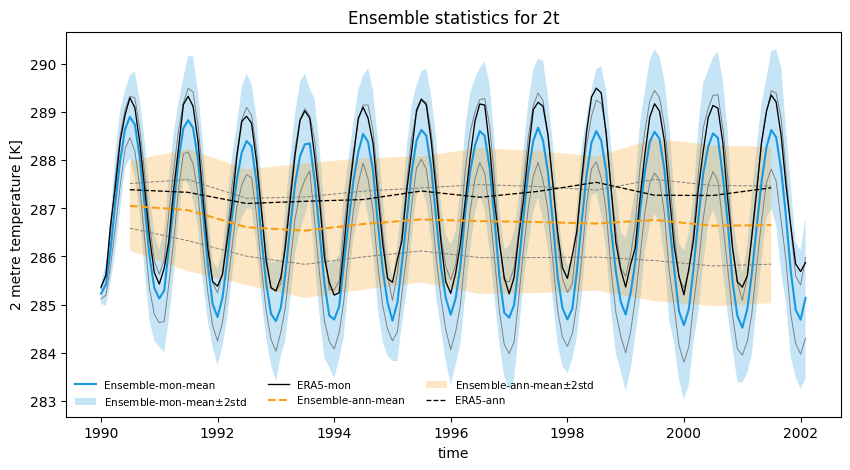

In [7]:
ts.run()